# Get clusters from Final.csv

In [1]:
%matplotlib inline
import numpy as np
import requests
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib as mat
import matplotlib.pyplot as plt
import os
 
sns.set(color_codes = True)

In [ ]:
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
DS_dir = currentdir + '/Data_Source'

try:
    os.mkdir(DS_dir, mode = 0o666)

except FileExistsError:
    
    pass

In [2]:
Final = pd.read_csv('./Data_Source/Final.csv')
Final[['zipcode', 'S_zip', 'F_zip', 'P_zip']] = Final[['zipcode', 'S_zip', 'F_zip', 'P_zip']].astype(str)
Final

,property_id,price,beds,baths,size(sqft),line,city,state,zipcode,longitude,...,S_zip,S_latitude,S_longitude,dist_S (mi.),F_zip,F_latitude,F_longitude,dist_F (mi.),crime_rate(%),POPDEN2010 (per sq. mi.)
0,M5001559427,410000,4,2,1440,104 Emily Dr,Manahawkin,NJ,8050,-74.242958,...,8050.0,39.702271,-74.256461,1.756368,8050.0,39.694973,-74.253075,1.222527,1.625024,485
1,M5003192128,749000,3,2,1812,152 Evelyn Dr,Manahawkin,NJ,8050,-74.240649,...,8050.0,39.702271,-74.256461,2.256102,8050.0,39.694973,-74.253075,1.720297,1.625024,485
2,M5018130177,484900,4,2,1786,1389 E Mallard Dr,Manahawkin,NJ,8050,-74.214566,...,8050.0,39.702271,-74.256461,3.034089,8050.0,39.694973,-74.253075,2.576884,1.625024,485
3,M5022367641,339000,3,2,1378,1062 Driftwood Ave,Manahawkin,NJ,8050,-74.275864,...,8050.0,39.741927,-74.280700,0.726137,8050.0,39.734573,-74.279594,0.264668,1.625024,485
4,M5024752662,395000,3,2,992,1219 Coast Ave,Manahawkin,NJ,8050,-74.286465,...,8050.0,39.741927,-74.280700,0.837592,8050.0,39.734573,-74.279594,0.461485,1.625024,485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2229,M6303112181,3399000,5,5,4966,14 E 29th St,Barnegat Light,NJ,8006,-74.114924,...,8758.0,39.788745,-74.201119,5.759499,8006.0,39.756428,-74.107544,1.162269,8.842730,254
2230,M6597277240,1499000,4,4,2462,38 W 8th St,Barnegat Light,NJ,8006,-74.109892,...,8758.0,39.788745,-74.201119,5.395256,8006.0,39.756428,-74.107544,0.202421,8.842730,254
2231,M6735381003,895000,3,3,1506,16 W 6th St,Barnegat Light,NJ,8006,-74.108170,...,8758.0,39.788745,-74.201119,5.449364,8006.0,39.756428,-74.107544,0.247408,8.842730,254
2232,M6921655107,1649000,4,3,2116,2202 Central Ave,Barnegat Light,NJ,8006,-74.112822,...,8758.0,39.788745,-74.201119,5.641933,8006.0,39.756428,-74.107544,0.757755,8.842730,254


In [3]:
Final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2234 entries, 0 to 2233
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   property_id               2234 non-null   object 
 1   price                     2234 non-null   int64  
 2   beds                      2234 non-null   int64  
 3   baths                     2234 non-null   int64  
 4   size(sqft)                2234 non-null   int64  
 5   line                      2234 non-null   object 
 6   city                      2234 non-null   object 
 7   state                     2234 non-null   object 
 8   zipcode                   2234 non-null   object 
 9   longitude                 2234 non-null   float64
 10  latitude                  2234 non-null   float64
 11  days_ago                  2234 non-null   int64  
 12  features                  2234 non-null   object 
 13  P_zip                     2234 non-null   object 
 14  P_latitu

In [4]:
Final.iloc[:,:13].describe().apply(lambda s: s.apply('{0:.2f}'.format))

,price,beds,baths,size(sqft),longitude,latitude,days_ago
count,2234.00,2234.00,2234.00,2234.00,2234.00,2234.00,2234.00
mean,492955.72,3.36,2.56,2062.09,-74.21,39.93,39.18
std,517837.92,1.23,1.09,1106.21,0.09,0.15,45.58
min,18500.00,1.00,1.00,480.00,-74.55,39.54,0.00
25%,264900.00,2.00,2.00,1328.00,-74.27,39.84,14.00
50%,379900.00,3.00,2.00,1840.00,-74.21,39.96,25.00
75%,569900.00,4.00,3.00,2582.00,-74.15,40.05,50.00
max,9950000.00,14.00,14.00,24873.00,-74.03,40.17,723.00


In [5]:
Final[['dist_P (mi.)', 'dist_S (mi.)', 'dist_F (mi.)']].describe().apply(lambda s: s.apply('{0:.2f}'.format))

,dist_P (mi.),dist_S (mi.),dist_F (mi.)
count,2234.00,2234.00,2234.00
mean,2.50,1.34,1.23
std,1.53,1.09,0.95
min,0.03,0.05,0.03
25%,1.21,0.56,0.53
50%,2.30,1.04,0.99
75%,3.63,1.74,1.65
max,7.87,6.73,6.27


In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
column_trans_s = ColumnTransformer([('bed_int', MinMaxScaler(), ['beds']),
                                    ('bath_int', MinMaxScaler(), ['baths']),
                                    ('size(sqft)_num', MinMaxScaler(),['size(sqft)']),
                                    ('longitude_num', MinMaxScaler(),['longitude']),
                                    ('latitude_long_num', MinMaxScaler(),['latitude']),
                                    ('dist_P (mi.)_num', MinMaxScaler(),['dist_P (mi.)']),
                                    ('dist_S (mi.)_num', MinMaxScaler(),['dist_S (mi.)']),
                                    ('dist_F (mi.)_num', MinMaxScaler(),['dist_F (mi.)']),
                                    ('crime_num', MinMaxScaler(),['crime_rate(%)']),
                                    ('popden_int', MinMaxScaler(),['POPDEN2010 (per sq. mi.)']),
                                    ('text', TfidfVectorizer(use_idf = True, stop_words = 'english'),'features')
                                   ], remainder = 'drop')

token = column_trans_s.fit_transform(Final)
token

C:\Users\Hwa-WeiWu\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):


array([[0.23076923, 0.07692308, 0.03935555, ..., 0.        , 0.80356257,
        0.        ],
       [0.15384615, 0.07692308, 0.05460583, ..., 0.        , 0.        ,
        0.73503301],
       [0.23076923, 0.07692308, 0.05353995, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.15384615, 0.15384615, 0.04206125, ..., 0.68364508, 0.        ,
        0.53643785],
       [0.23076923, 0.15384615, 0.06706842, ..., 0.        , 0.        ,
        0.73503301],
       [0.15384615, 0.07692308, 0.04853852, ..., 0.        , 0.        ,
        1.        ]])

In [7]:
token.shape

(2234, 15)

## Cosine Similarity

In [8]:
from sklearn.metrics.pairwise import cosine_similarity

cos_sim = cosine_similarity(token)
cos_sim

C:\Users\Hwa-WeiWu\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float


array([[1.        , 0.62487347, 0.40917649, ..., 0.55757029, 0.62017989,
        0.42195241],
       [0.62487347, 1.        , 0.84330528, ..., 0.77732759, 0.91093371,
        0.78245939],
       [0.40917649, 0.84330528, 1.        , ..., 0.71734379, 0.81253559,
        0.90925644],
       ...,
       [0.55757029, 0.77732759, 0.71734379, ..., 1.        , 0.90528116,
        0.84345515],
       [0.62017989, 0.91093371, 0.81253559, ..., 0.90528116, 1.        ,
        0.9070569 ],
       [0.42195241, 0.78245939, 0.90925644, ..., 0.84345515, 0.9070569 ,
        1.        ]])

## DBSCAN

In [9]:
from sklearn.cluster import DBSCAN
model_DB = DBSCAN(eps = 0.01, min_samples = 30, metric = 'cosine').fit(cos_sim)
labels = model_DB.labels_

unique, counts = np.unique(labels, return_counts = True)
print(dict(zip(unique, counts)))

C:\Users\Hwa-WeiWu\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\Hwa-WeiWu\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy

{-1: 16, 0: 878, 1: 1340}


In [10]:
labels

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [11]:
_vars = Final.columns.tolist()
_vars = _vars[:5] + ['latitude'] + ['longitude'] + ['dist_P (mi.)'] + ['dist_S (mi.)'] + ['dist_F (mi.)'] + _vars[-2:] + ['features'] 
_vars

['property_id',
 'price',
 'beds',
 'baths',
 'size(sqft)',
 'latitude',
 'longitude',
 'dist_P (mi.)',
 'dist_S (mi.)',
 'dist_F (mi.)',
 'crime_rate(%)',
 'POPDEN2010 (per sq. mi.)',
 'features']

In [12]:
F = Final[_vars].copy()
F.insert(5, 'cluster', labels, True)
F

,property_id,price,beds,baths,size(sqft),cluster,latitude,longitude,dist_P (mi.),dist_S (mi.),dist_F (mi.),crime_rate(%),POPDEN2010 (per sq. mi.),features
0,M5001559427,410000,4,2,1440,0,39.679167,-74.242958,0.964373,1.756368,1.222527,1.625024,485,"garage_1_or_more, single_story"
1,M5003192128,749000,3,2,1812,1,39.672062,-74.240649,1.465011,2.256102,1.720297,1.625024,485,"garage_1_or_more, two_or_more_stories"
2,M5018130177,484900,4,2,1786,1,39.673382,-74.214566,2.334551,3.034089,2.576884,1.625024,485,two_or_more_stories
3,M5022367641,339000,3,2,1378,0,39.732124,-74.275864,3.107790,0.726137,0.264668,1.625024,485,"garage_1_or_more, single_story"
4,M5024752662,395000,3,2,992,0,39.730678,-74.286465,3.325412,0.837592,0.461485,1.625024,485,"basement, single_story"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2229,M6303112181,3399000,5,5,4966,1,39.740628,-74.114924,2.690288,5.759499,1.162269,8.842730,254,"basement, garage_1_or_more, garage_2_or_more, ..."
2230,M6597277240,1499000,4,4,2462,1,39.758698,-74.109892,3.948457,5.395256,0.202421,8.842730,254,"garage_1_or_more, garage_2_or_more, two_or_mor..."
2231,M6735381003,895000,3,3,1506,1,39.759979,-74.108170,4.064564,5.449364,0.247408,8.842730,254,"garage_1_or_more, garage_2_or_more, two_or_mor..."
2232,M6921655107,1649000,4,3,2116,1,39.746271,-74.112822,3.092886,5.641933,0.757755,8.842730,254,"garage_1_or_more, two_or_more_stories"


In [13]:
# F.to_csv('./Data_Source/Final_clustered.csv', index = False)

## Comparison of clusters

In [14]:
F = pd.read_csv('./Final with cluster.csv')

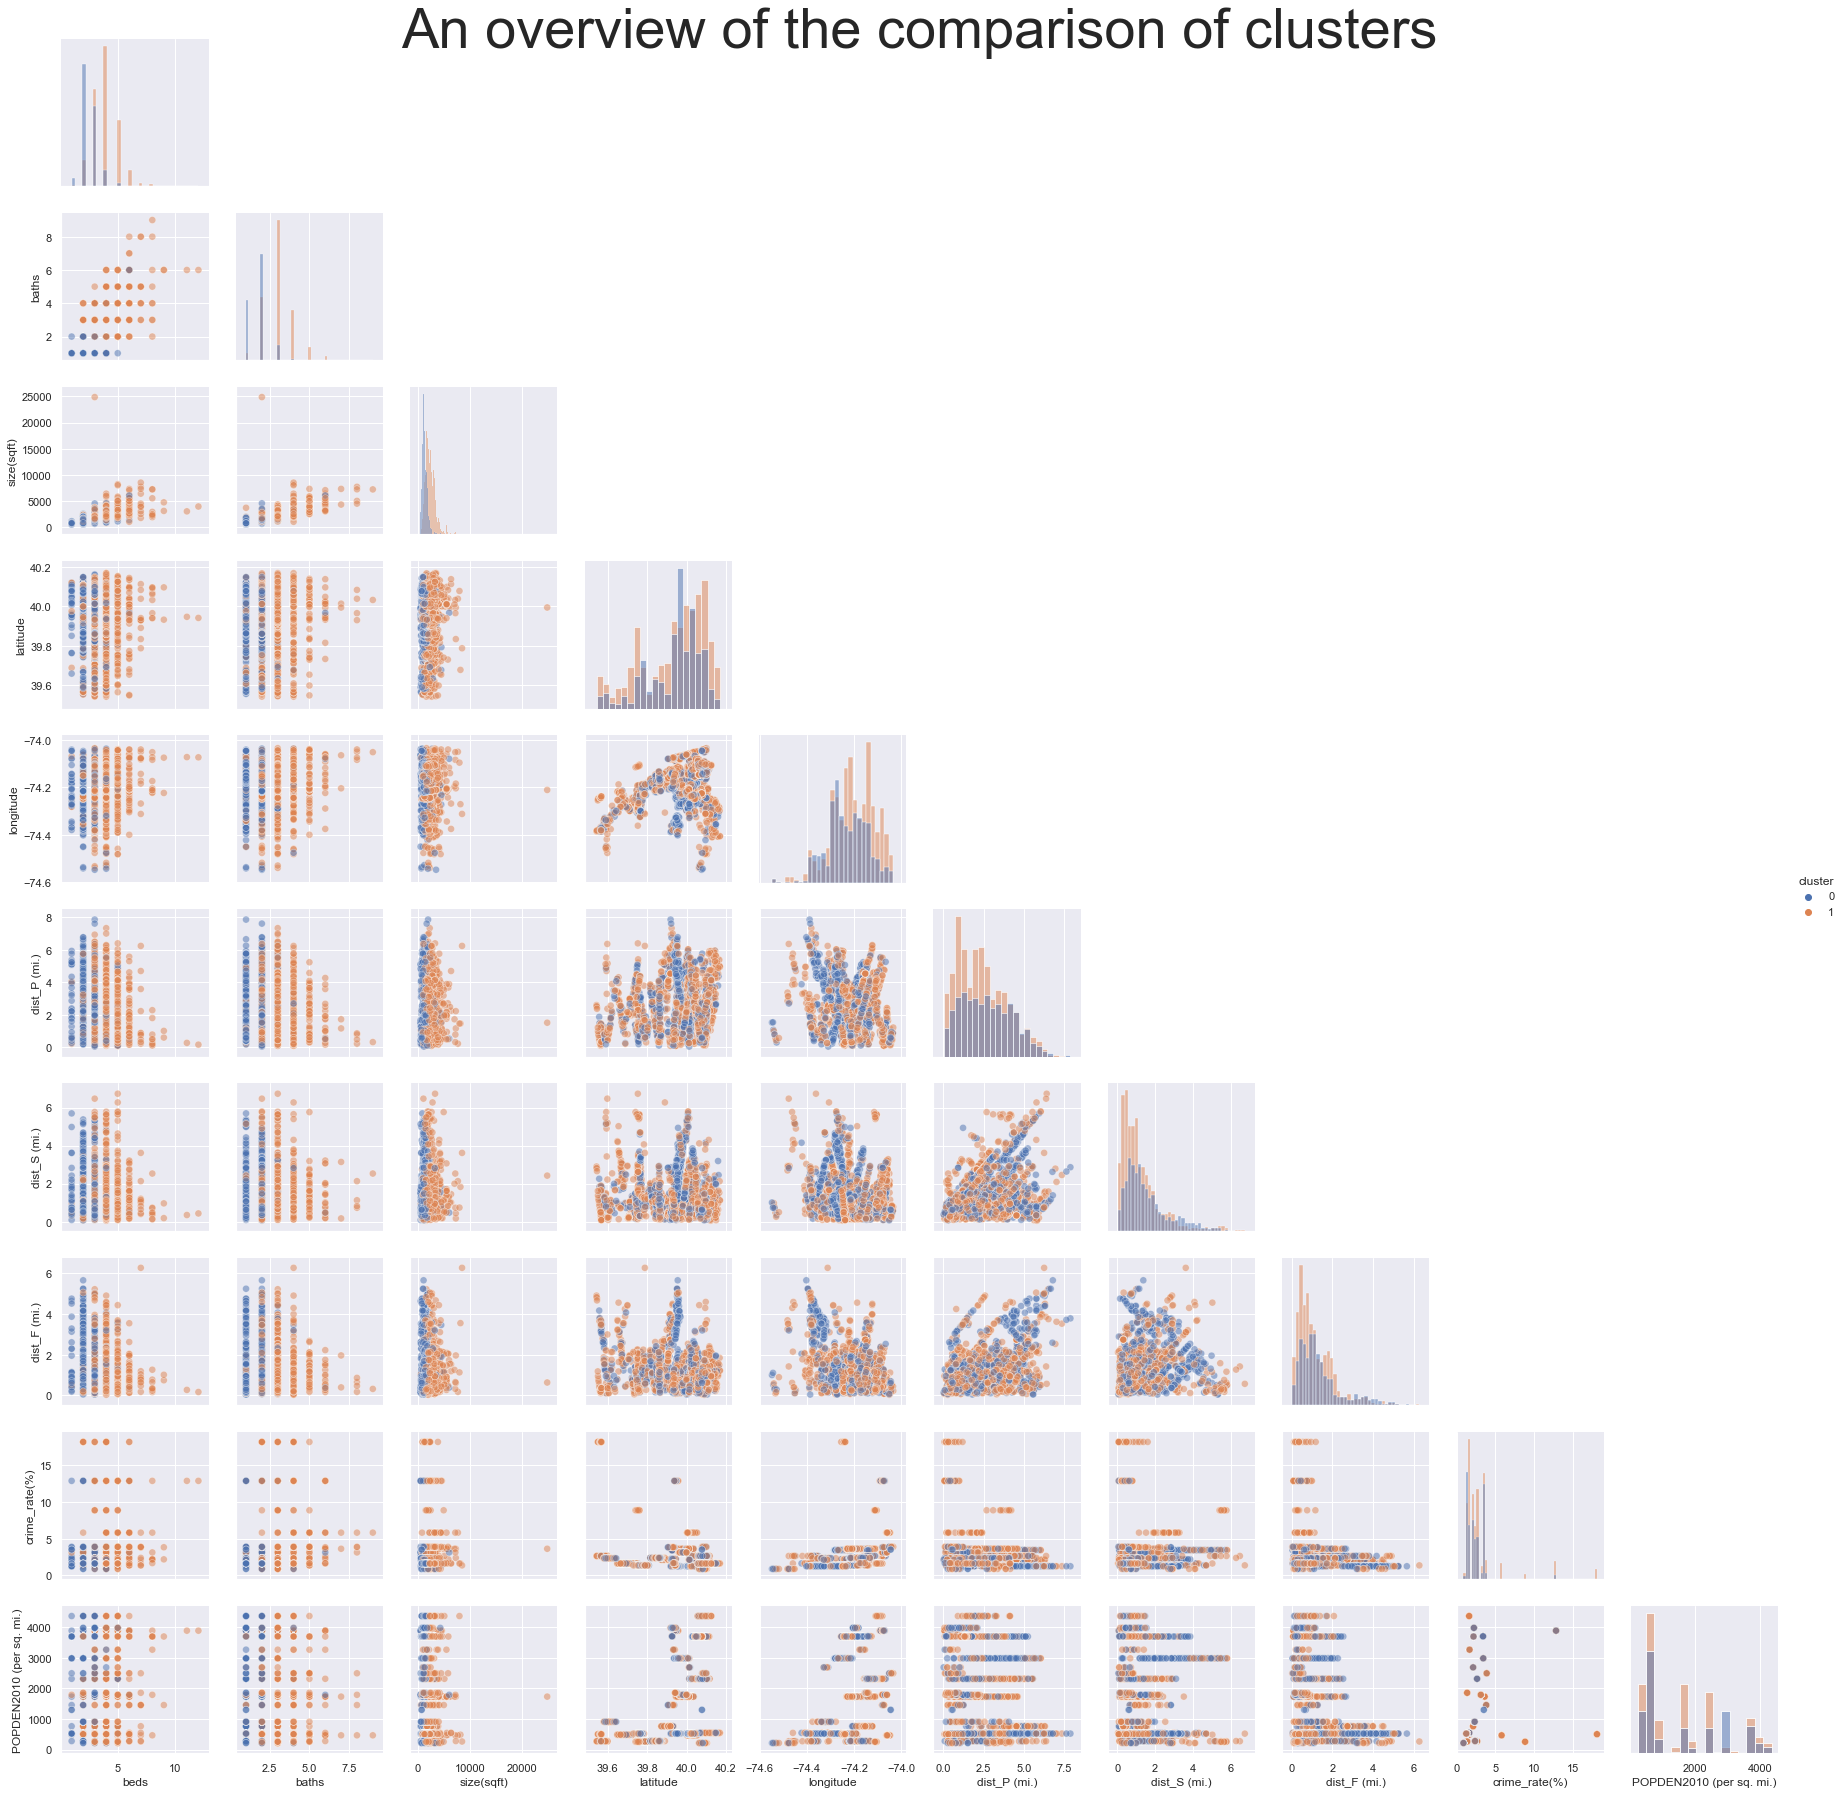

In [13]:
sns.set()

PairGrid = sns.PairGrid(F[(F['cluster'] == 0) | (F['cluster'] == 1)], vars = _vars[2:-1], hue = 'cluster', 
                        diag_sharey = False, corner = True)
PairGrid.map_lower(sns.scatterplot, s = 50, edgecolor = 'white', alpha = 0.5)
PairGrid.map_diag(sns.histplot)
PairGrid.add_legend()

PairGrid.fig.suptitle('An overview of the comparison of clusters', fontsize = 56, ha = 'center', va = 'baseline')
plt.show()

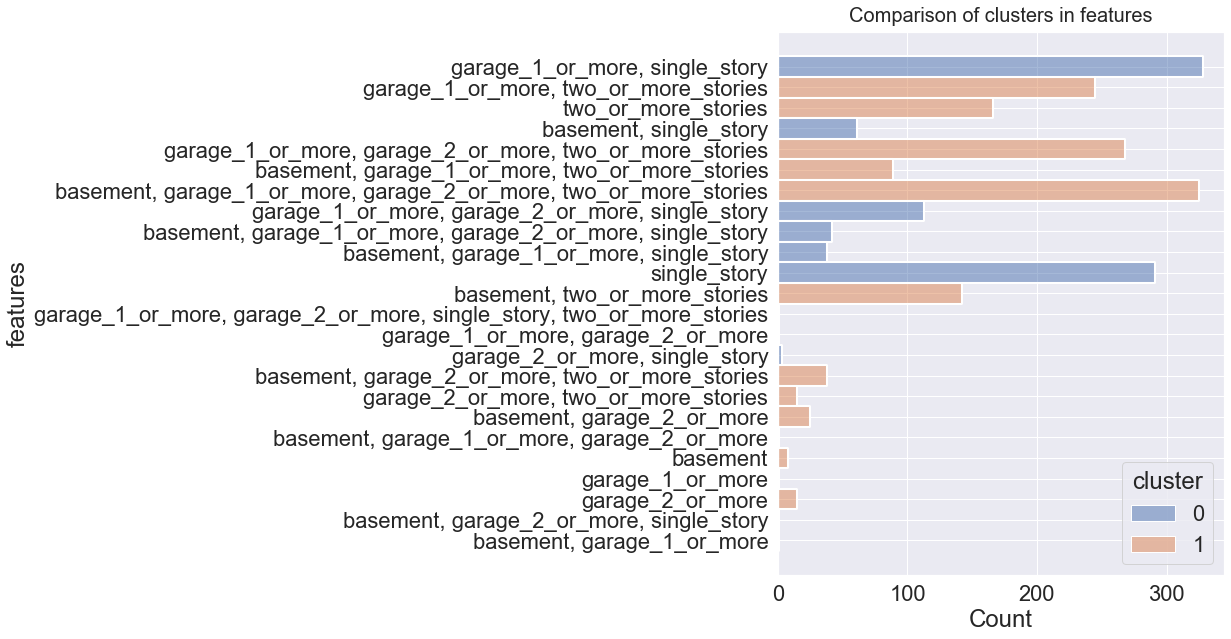

In [14]:
sns.set(font_scale = 2)
fig, ax = plt.subplots(figsize = (8,10))

sns.histplot(data = F[(F['cluster'] == 0) | (F['cluster'] == 1)], 
             y = 'features', hue = 'cluster')

plt.title('Comparison of clusters in features', fontsize = 20, ha = 'center', va = 'bottom')
plt.show()

In [43]:
F['g_features'] = "not specified"
F.loc[F['features'].str.contains("single_story"), 'g_features'] = "*, single_story"
F.loc[F['features'].str.contains("two_or_more_stories"), 'g_features'] = "*, two_or_more_stories"
F[['cluster', 'features', 'g_features']]

,cluster,features,g_features
0,0,"garage_1_or_more, single_story","*, single_story"
1,1,"garage_1_or_more, two_or_more_stories","*, two_or_more_stories"
2,1,two_or_more_stories,"*, two_or_more_stories"
3,0,"garage_1_or_more, single_story","*, single_story"
4,0,"basement, single_story","*, single_story"
...,...,...,...
2229,1,"basement, garage_1_or_more, garage_2_or_more, ...","*, two_or_more_stories"
2230,1,"garage_1_or_more, garage_2_or_more, two_or_mor...","*, two_or_more_stories"
2231,1,"garage_1_or_more, garage_2_or_more, two_or_mor...","*, two_or_more_stories"
2232,1,"garage_1_or_more, two_or_more_stories","*, two_or_more_stories"


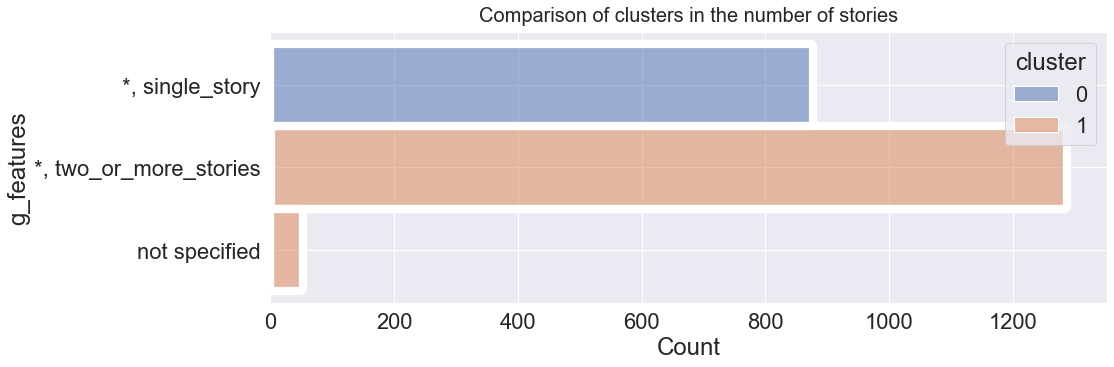

In [44]:
sns.set(font_scale = 2)
fig, ax = plt.subplots(figsize = (15,5))

sns.histplot(data = F[(F['cluster'] == 0) | (F['cluster'] == 1)], 
             y = 'g_features', hue = 'cluster')

plt.title('Comparison of clusters in the number of stories', fontsize = 20, ha = 'center', va = 'bottom')
plt.show()

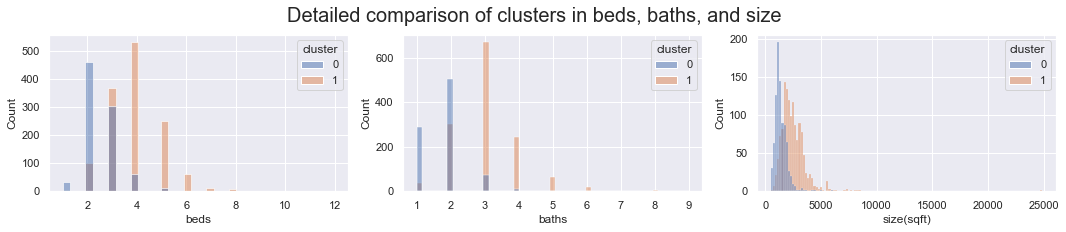

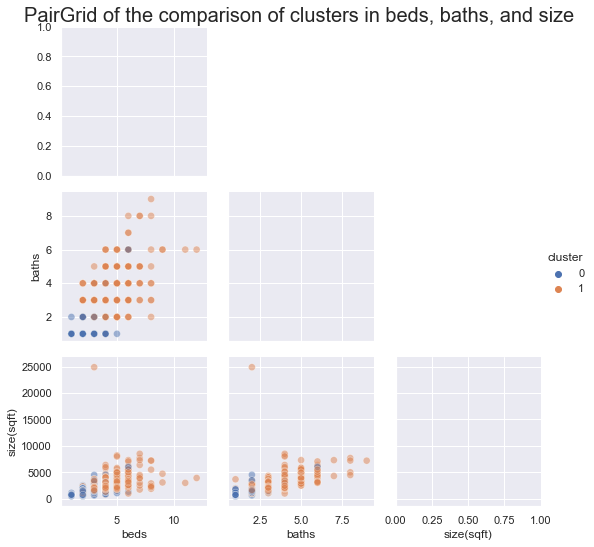

In [15]:
sns.set()

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15,3))
for x in _vars[2:5]:
    sns.histplot(ax = ax[(_vars.index(x)-2)%3], data = F[(F['cluster'] == 0) | (F['cluster'] == 1)], 
                 x = x, hue = 'cluster')
fig.suptitle('Detailed comparison of clusters in beds, baths, and size', fontsize = 20, ha = 'center', va = 'bottom')
plt.tight_layout()

PairGrid_1 = sns.PairGrid(F[(F['cluster'] == 0) | (F['cluster'] == 1)], vars = _vars[2:5], 
                          hue = 'cluster', diag_sharey = False, corner = True)
PairGrid_1.map_lower(sns.scatterplot, s = 50, edgecolor = 'white', alpha = 0.5)
PairGrid_1.add_legend()

PairGrid_1.fig.suptitle('PairGrid of the comparison of clusters in beds, baths, and size', fontsize = 20, ha = 'center', va = 'baseline')
plt.show()

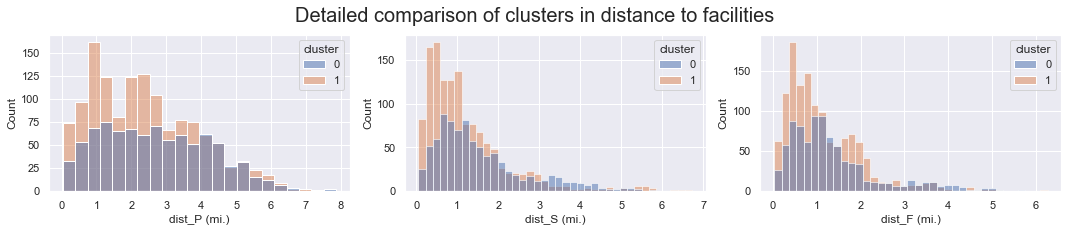

In [16]:
sns.set()

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15,3))
for x in _vars[7:10]:
    sns.histplot(ax = ax[(_vars.index(x)-7)%3], data = F[(F['cluster'] == 0) | (F['cluster'] == 1)], 
                 x = x, hue = 'cluster')

fig.suptitle('Detailed comparison of clusters in distance to facilities', fontsize = 20, ha = 'center', va = 'bottom')
plt.tight_layout()

In [17]:
MB_nj = gpd.read_file('./Municipal_Boundaries_of_NJ.shp')

ocean_county = MB_nj[MB_nj['COUNTY'] == 'OCEAN']
ocean_county = ocean_county.to_crs(epsg = 4326)

In [18]:
ocean = gpd.read_file('./OceanCountyParcels.shp')
ocean = ocean.to_crs(epsg = 4326)

## Visualize clusters on the map

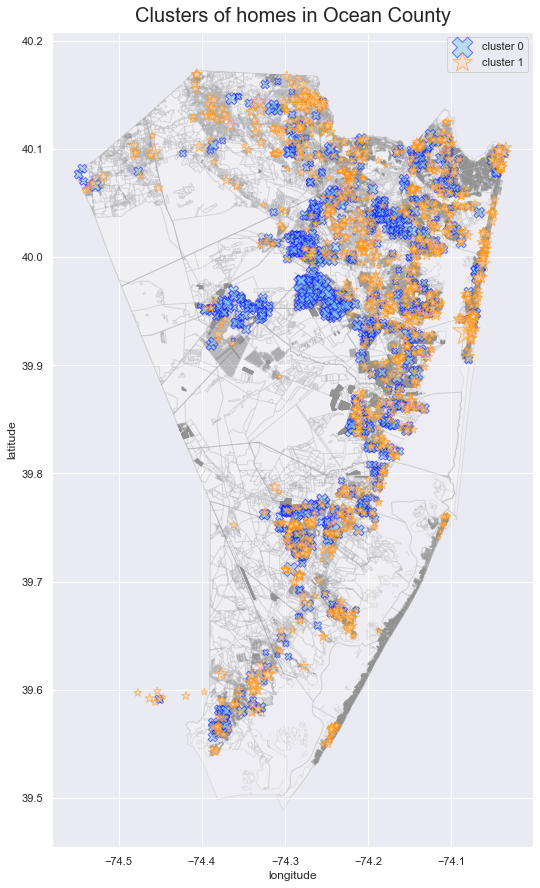

In [19]:
fig, ax = plt.subplots(figsize = (12, 15))
ax.set_aspect('equal')

ocean.plot(ax = ax, color = 'white', 
           edgecolor = 'grey', alpha = 0.15).set_title('Homes, Police Stations, and Crime Rate in Ocean County',
                                                       fontsize = 20, ha = 'center', va = 'bottom')

ocean_county.plot(ax = ax, color = 'white', edgecolor = 'grey', 
                  alpha = 0.15).set_title('Clusters of homes in Ocean County',
                                          fontsize = 20, ha = 'center', va = 'bottom')

F[F['cluster'] == 0].plot(ax = ax, kind = "scatter", x = 'longitude', y = 'latitude',
                  s = Final['size(sqft)']/30, label = 'cluster 0',
                  color = 'skyblue', edgecolors = 'blue', alpha = 0.5,
                  marker = 'X')

F[F['cluster'] == 1].plot(ax = ax, kind = "scatter", x = 'longitude', y = 'latitude',
                  s = Final['size(sqft)']/30, label = 'cluster 1',
                  color = 'peachpuff', edgecolors = 'darkorange', alpha = 0.5,
                  marker = '*')

plt.show()

## Evaluation

In [12]:
from sklearn.metrics import silhouette_score

silhouette_score(cos_sim, labels, metric = 'cosine')

C:\Users\Hwa-WeiWu\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Hwa-WeiWu\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float


0.7337736050153073

In [15]:
from sklearn.metrics import calinski_harabasz_score

calinski_harabasz_score(cos_sim, labels)

1389.9894281099098

In [17]:
clustered_Final = Final.merge(F)
clustered_Final

,property_id,price,beds,baths,size(sqft),line,city,state,zipcode,longitude,...,S_latitude,S_longitude,dist_S (mi.),F_zip,F_latitude,F_longitude,dist_F (mi.),crime_rate(%),POPDEN2010 (per sq. mi.),cluster
0,M5001559427,410000,4,2,1440,104 Emily Dr,Manahawkin,NJ,8050,-74.242958,...,39.702271,-74.256461,1.756368,8050.0,39.694973,-74.253075,1.222527,1.625024,485,0
1,M5003192128,749000,3,2,1812,152 Evelyn Dr,Manahawkin,NJ,8050,-74.240649,...,39.702271,-74.256461,2.256102,8050.0,39.694973,-74.253075,1.720297,1.625024,485,1
2,M5018130177,484900,4,2,1786,1389 E Mallard Dr,Manahawkin,NJ,8050,-74.214566,...,39.702271,-74.256461,3.034089,8050.0,39.694973,-74.253075,2.576884,1.625024,485,1
3,M5022367641,339000,3,2,1378,1062 Driftwood Ave,Manahawkin,NJ,8050,-74.275864,...,39.741927,-74.280700,0.726137,8050.0,39.734573,-74.279594,0.264668,1.625024,485,0
4,M5024752662,395000,3,2,992,1219 Coast Ave,Manahawkin,NJ,8050,-74.286465,...,39.741927,-74.280700,0.837592,8050.0,39.734573,-74.279594,0.461485,1.625024,485,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2229,M6303112181,3399000,5,5,4966,14 E 29th St,Barnegat Light,NJ,8006,-74.114924,...,39.788745,-74.201119,5.759499,8006.0,39.756428,-74.107544,1.162269,8.842730,254,1
2230,M6597277240,1499000,4,4,2462,38 W 8th St,Barnegat Light,NJ,8006,-74.109892,...,39.788745,-74.201119,5.395256,8006.0,39.756428,-74.107544,0.202421,8.842730,254,1
2231,M6735381003,895000,3,3,1506,16 W 6th St,Barnegat Light,NJ,8006,-74.108170,...,39.788745,-74.201119,5.449364,8006.0,39.756428,-74.107544,0.247408,8.842730,254,1
2232,M6921655107,1649000,4,3,2116,2202 Central Ave,Barnegat Light,NJ,8006,-74.112822,...,39.788745,-74.201119,5.641933,8006.0,39.756428,-74.107544,0.757755,8.842730,254,1


## Get Top-N Recommendations

In [59]:
def getRecommendations(propertyID, cities, N):

    house = clustered_Final[clustered_Final['property_id'] == propertyID]

    print('Based on your choice:')
    display(house)

    cluster_user = house['cluster'].values[0]

    print('\n\n\n')
    print(f'We recommend you TOP {N} houses:')
    print(f'in these municipalities{cities}')
    display(clustered_Final[(clustered_Final['cluster'] == cluster_user) & (clustered_Final['city'].isin(cities)) & ~(clustered_Final['property_id'] == propertyID)].sort_values('price').head(N))


In [61]:
getRecommendations('M5001559427', ['Manchester', 'Manahawkin', 'Toms River'], 5)

Based on your choice:


,property_id,price,beds,baths,size(sqft),line,city,state,zipcode,longitude,...,S_latitude,S_longitude,dist_S (mi.),F_zip,F_latitude,F_longitude,dist_F (mi.),crime_rate(%),POPDEN2010 (per sq. mi.),cluster
0,M5001559427,410000,4,2,1440,104 Emily Dr,Manahawkin,NJ,8050,-74.242958,...,39.702271,-74.256461,1.756368,8050.0,39.694973,-74.253075,1.222527,1.625024,485,0






We recommend you TOP 5 houses:
in these municipalities['Manchester', 'Manahawkin', 'Toms River']


,property_id,price,beds,baths,size(sqft),line,city,state,zipcode,longitude,...,S_latitude,S_longitude,dist_S (mi.),F_zip,F_latitude,F_longitude,dist_F (mi.),crime_rate(%),POPDEN2010 (per sq. mi.),cluster
513,M9594122079,44000,2,1,900,5 Chestnut St Unit A,Toms River,NJ,8757,-74.223526,...,39.940520,-74.211638,1.978155,8757.0,39.965088,-74.245430,1.208474,3.441911,2986,0
511,M9075912161,51900,1,1,672,16D Willow St,Toms River,NJ,8757,-74.238862,...,39.940520,-74.211638,4.976571,8757.0,40.000538,-74.272789,1.949695,3.441911,2986,0
1478,M9672282972,63000,1,1,702,15B Yorkshire Ct,Manchester,NJ,8759,-74.271146,...,40.019855,-74.265528,0.375758,8757.0,40.000538,-74.272789,1.119477,1.248665,522,0
68,M6306526127,70000,2,2,1126,15 Sycamore Rd,Manahawkin,NJ,8050,-74.306329,...,39.741927,-74.280700,1.459152,8050.0,39.734573,-74.279594,1.725931,1.625024,485,0
1454,M9174524154,74900,2,1,858,79A Cambridge Cir,Manchester,NJ,8759,-74.276158,...,40.019855,-74.265528,0.742371,8757.0,40.000538,-74.272789,0.889263,1.248665,522,0
